In [1]:
import numpy as np
import matplotlib.pyplot as plt

import scipy.misc
I = scipy.misc.face().mean(axis=2)[::-1]

# Affine transformation of the pixel grid

transformation and interpolation to compare, pixel to pixel, area of deformed images

In [2]:
from scipy.interpolate import interpn

In [3]:
# Define a box area
# bottom left corner, and width, height
x, y, w, h = 480, 370, 320, 150
box = np.array([[x, x+w, x+w, x, x],
                [y, y, y+h, y+h, y]]).T

In [4]:
# Define an affine transformation
# translation + transformation matrix

def affine(xy, A):
    dxy = xy - xy[0, :]

    xy_prime = np.einsum('ij, ik', A[:, 1:], dxy.T).T
    xy_prime += xy[0, :] + A[:, 0]
    return xy_prime

In [5]:
A = np.array([[10, 1.3, 0.41], [-20, -0.41, 1]])

box_prime = affine(box, A)

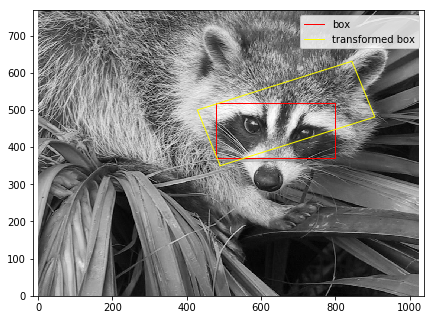

In [6]:
# Plot
plt.figure(figsize=(7,7*I.shape[0]/I.shape[1]))
plt.pcolormesh(I, cmap = 'gray');
plt.plot(box[:, 0], box[:, 1], '-', color='red', linewidth=1, label='box');
plt.plot(box_prime[:, 0], box_prime[:, 1], '-', color='yellow',
         linewidth=1, label='transformed box');
plt.axis('equal'); plt.legend();

In [7]:
# Map pixel of the box to box_prime

In [8]:
# List pixels coords of the box
x_grid, y_grid = np.meshgrid(np.arange(x, x+w), np.arange(y, y+h))
xy_list = np.vstack([x_grid.flatten(), y_grid.flatten()]).T

In [9]:
# Apply the transformation to the pixel grid
xy_prime_list = affine(xy_list, A)

In [10]:
# Interpolation of the image at the point of the transformed grid
x_span, y_span = np.arange(I.shape[0]), np.arange(I.shape[1])
I_prime_list = interpn((y_span, x_span), I.T, xy_prime_list,
                       method='splinef2d')
I_prime_grid = I_prime_list.reshape(x_grid.shape)

x_prime_grid = xy_prime_list[:, 0].reshape(x_grid.shape)
y_prime_grid = xy_prime_list[:, 1].reshape(x_grid.shape)

In [17]:
print('I_prime_grid shape:', I_prime_grid.T.shape )
print('box size:', (w, h) )

I_prime_grid shape: (320, 150)
box size: (320, 150)


`I_prime_grid` is the same shape as the original box `(w, h)`. So, this the pixel values of this to areas can be compared.

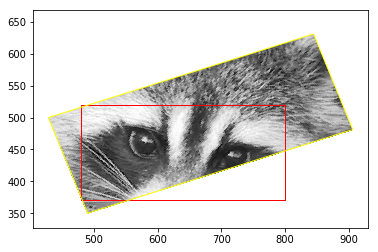

In [18]:
# Graph
plt.pcolormesh(x_prime_grid, y_prime_grid, I_prime_grid, cmap = 'gray');
plt.plot(box[:, 0], box[:, 1], '-', color='red', linewidth=1);
plt.plot(box_prime[:, 0], box_prime[:, 1], '-', color='yellow', linewidth=1);
plt.axis('equal');

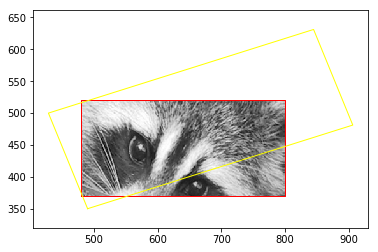

In [12]:
# Graph2: Deformed box projected back on the original box
plt.pcolormesh(x_grid, y_grid, I_prime_grid, cmap = 'gray');
plt.plot(box[:, 0], box[:, 1], '-', color='red', linewidth=1);
plt.plot(box_prime[:, 0], box_prime[:, 1], '-', color='yellow', linewidth=1);
plt.axis('equal');

Use other interpolation method?

spline --> do the smoothing at the same time...

In [112]:
# Using RectBivariateSpline

In [19]:
from scipy.interpolate import RectBivariateSpline#(x, y, z, bbox=[None

In [109]:
spline_degree = 3
x_span, y_span = np.arange(I.shape[0]), np.arange(I.shape[1])
interpol_spline = RectBivariateSpline(x_span, y_span, I,
                                      s=0, kx=spline_degree, ky=spline_degree)

In [110]:
I_prime_list = interpol_spline(xy_prime_list[:, 1], xy_prime_list[:, 0],
                               grid=False, dx=0, dy=0)
I_prime_grid = I_prime_list.reshape(x_grid.shape)

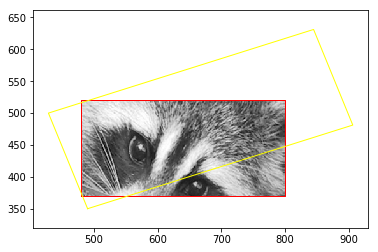

In [111]:
# Graph2: Deformed box projected back on the original box
plt.pcolormesh(x_grid, y_grid, I_prime_grid, cmap = 'gray');
plt.plot(box[:, 0], box[:, 1], '-', color='red', linewidth=1);
plt.plot(box_prime[:, 0], box_prime[:, 1], '-', color='yellow', linewidth=1);
plt.axis('equal');

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.interpolate.RectBivariateSpline.html#scipy.interpolate.RectBivariateSpline

ndimage:
https://docs.scipy.org/doc/scipy/reference/tutorial/ndimage.html#id2

In [117]:
from scipy.interpolate import bisplrep, bisplev

In [119]:
#tck = bisplrep(x_span, y_span, I., s=0)